In [54]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [56]:
import pandas as pd
data = pd.read_csv('railway.csv')
data

Transaction ID Date of Purchase Time of Purchase  \
0      da8a6ba8-b3dc-4677-b176        12/8/2023         12:41:11   
1      b0cdd1b0-f214-4197-be53       12/16/2023         11:23:01   
2      f3ba7a96-f713-40d9-9629       12/19/2023         19:51:27   
3      b2471f11-4fe7-4c87-8ab4       12/20/2023         23:00:36   
4      2be00b45-0762-485e-a7a3       12/27/2023         18:22:56   
...                        ...              ...              ...   
31648  1304623d-b8b7-4999-8e9c        4/30/2024         18:42:58   
31649  7da22246-f480-417c-bc2f        4/30/2024         18:46:10   
31650  add9debf-46c1-4c75-b52d        4/30/2024         18:56:41   
31651  b92b047c-21fd-4859-966a        4/30/2024         19:51:47   
31652  1d5d89a2-bde5-410f-8f91        4/30/2024         20:05:39   

      Purchase Type Payment Method Railcard Ticket Class Ticket Type  Price  \
0            Online    Contactless    Adult     Standard     Advance     43   
1           Station    Credit Card    Adult     Standard     Advance     23   
2            Online    Credit Card      NaN     Standard     Advance      3   
3           Station    Credit Card      NaN     Standard     Advance     13   
4            Online    Contactless      NaN     Standard     Advance     76   
...             ...            ...      ...          ...         ...    ...   
31648        Online    Credit Card      NaN     Standard    Off-Peak      4   
31649        Online    Contactless      NaN     Standard    Off-Peak     10   
31650       Station    Credit Card      NaN     Standard    Off-Peak      4   
31651       Station    Credit Card      NaN     Standard    Off-Peak     10   
31652       Station    Credit Card    Adult     Standard    Off-Peak      3   

           Departure Station    Arrival Destination Date of Journey  \
0          London Paddington  Liverpool Lime Street        1/1/2024   
1         London Kings Cross                   York        1/1/2024   
2      Liverpool Lime Street  Manchester Piccadilly        1/2/2024   
3          London Paddington                Reading        1/1/2024   
4      Liverpool Lime Street          London Euston        1/1/2024   
...                      ...                    ...             ...   
31648  Manchester Piccadilly  Liverpool Lime Street       4/30/2024   
31649          London Euston  Birmingham New Street       4/30/2024   
31650  Manchester Piccadilly  Liverpool Lime Street       4/30/2024   
31651          London Euston  Birmingham New Street       4/30/2024   
31652  Liverpool Lime Street  Manchester Piccadilly       4/30/2024   

      Departure Time Arrival Time Actual Arrival Time Journey Status  \
0           11:00:00     13:30:00            13:30:00        On Time   
1            9:45:00     11:35:00            11:40:00        Delayed   
2           18:15:00     18:45:00            18:45:00        On Time   
3           21:30:00     22:30:00            22:30:00        On Time   
4           16:45:00     19:00:00            19:00:00        On Time   
...              ...          ...                 ...            ...   
31648       20:00:00     20:30:00            20:30:00        On Time   
31649       20:15:00     21:35:00            21:35:00        On Time   
31650       20:15:00     20:45:00            20:45:00        On Time   
31651       21:15:00     22:35:00            22:35:00        On Time   
31652       21:30:00     22:00:00            22:00:00        On Time   

      Reason for Delay Refund Request  
0                  NaN             No  
1       Signal Failure             No  
2                  NaN             No  
3                  NaN             No  
4                  NaN             No  
...                ...            ...  
31648              NaN             No  
31649              NaN             No  
31650              NaN             No  
31651              NaN             No  
31652              NaN             No  

[31653 rows x 18 columns]

In [57]:
# Remove extra spaces from column names
data.columns = data.columns.str.strip()

In [58]:
print(data.columns)


Index(['Transaction ID', 'Date of Purchase', 'Time of Purchase',
       'Purchase Type', 'Payment Method', 'Railcard', 'Ticket Class',
       'Ticket Type', 'Price', 'Departure Station', 'Arrival Destination',
       'Date of Journey', 'Departure Time', 'Arrival Time',
       'Actual Arrival Time', 'Journey Status', 'Reason for Delay',
       'Refund Request'],
      dtype='object')


Brief explanation of each feature:
 
  1- Transaction ID: A unique identifier for each ticket purchase transaction.
  2- Date of Purchase: The date on which the ticket was purchased.
  3- Time of Purchase: The time at which the ticket was purchase.
  4- Purchase Type: The method of purchase, such as online, from the station .
  5- Payment Method: The payment method used could be credit card, debit card or Contactless [ApplyPay, GooglePay].
  6- Railcard: If applicable, the type of discount railcard used.
  7- Ticket Class: The class of the ticket, such as standard or first class.
  8- Ticket Type: The type of ticket purchased could be Off-Peak, Advance or Anytime.
  9- Price: The cost of the ticket.
 10- Departure Station: The station from which the journey starts.
 11- Arrival Destination: The station where the journey ends.
 12- Date of Journey: The date of the train journey.
 13- Departure Time: The scheduled departure time of the train.
 14- Arrival Time: The scheduled arrival time at the destination station.
 15- Actual Arrival Time: The actual time the train arrived at the destination.
 16- Journey Status: The status of the journey could be On time, Delayed or Cancelled.
 17- Reason for Delay: If applicable, the reason for the train's delay, such as weather, technical issues and etc...
 18- Refund Request: Indicates whether a refund was requested by the passenger due to issues like delays or cancellations.
 

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction ID       31653 non-null  object
 1   Date of Purchase     31653 non-null  object
 2   Time of Purchase     31653 non-null  object
 3   Purchase Type        31653 non-null  object
 4   Payment Method       31653 non-null  object
 5   Railcard             10735 non-null  object
 6   Ticket Class         31653 non-null  object
 7   Ticket Type          31653 non-null  object
 8   Price                31653 non-null  int64 
 9   Departure Station    31653 non-null  object
 10  Arrival Destination  31653 non-null  object
 11  Date of Journey      31653 non-null  object
 12  Departure Time       31653 non-null  object
 13  Arrival Time         31653 non-null  object
 14  Actual Arrival Time  29773 non-null  object
 15  Journey Status       31653 non-null  object
 16  Reas

In [60]:
data.isna().sum()

Transaction ID             0
Date of Purchase           0
Time of Purchase           0
Purchase Type              0
Payment Method             0
Railcard               20918
Ticket Class               0
Ticket Type                0
Price                      0
Departure Station          0
Arrival Destination        0
Date of Journey            0
Departure Time             0
Arrival Time               0
Actual Arrival Time     1880
Journey Status             0
Reason for Delay       27481
Refund Request             0
dtype: int64

In [61]:
#fill missing values
data['Railcard']=data['Railcard'].fillna('None')
data['Reason for Delay']=data['Reason for Delay'].fillna('Not Dalyed')
#drop rows is missing
df=data.dropna(subset=['Actual Arrival Time'])


Step 1: Missing values in the 'Railcard' column are filled with "None" 
– we assume no discount card was used.

Step 2: We check how many 'Reason for Delay' values are missing when the trip was delayed or cancelled. That helps validate whether the missing data is meaningful.

Step 3: Missing values in 'Reason for Delay' are filled with "Not Delayed" for cleaner modeling and analysis.

Step 4: Finally, we display how many missing values remain in each column.

This steps are essential before modeling, as most models don't work with missing values directly.

In [62]:
# Convert missing values to a new category since they will be useful in the model

data['Railcard'] = data['Railcard'].fillna("None")
print("NA values for Reason.for.Delay when journey status is not On Time: ",data[data['Journey Status']!='On Time']['Reason for Delay'].isna().sum())
data['Reason for Delay'] = data['Reason for Delay'].fillna("Not Delayed")
data.isna().sum()

NA values for Reason.for.Delay when journey status is not On Time:  0


Transaction ID            0
Date of Purchase          0
Time of Purchase          0
Purchase Type             0
Payment Method            0
Railcard                  0
Ticket Class              0
Ticket Type               0
Price                     0
Departure Station         0
Arrival Destination       0
Date of Journey           0
Departure Time            0
Arrival Time              0
Actual Arrival Time    1880
Journey Status            0
Reason for Delay          0
Refund Request            0
dtype: int64



 Univariate Analysis Summary (Categorical Data)

This dashboard shows univariate analysis of several categorical columns from the railway dataset:

- **Payment Method Count**:
  - Most users paid with **Credit Card** (~19,316), followed by **Contactless** (~10,834).
  - Few used **Debit Card** (~1,683).

- **Railcard Type**:
  - The majority are **Adult** railcards (~4,846), with fewer **Disabled** (~3,089) and **Senior** (~2,802).

- **Ticket Class**:
  - Most tickets are **Standard class** (~28,959), with very few **First Class** (~3,058).

- **Ticket Type**:
  - **Advance** tickets are most common (~17,931), followed by **Off-Peak** and **Anytime**.

- **Journey Status**:
  - Most journeys were **On Time** (~27,411).
  - Smaller numbers were **Delayed** (~2,792) or **Cancelled** (~1,880).

- **Refund Request by Journey Status**:
  - Almost all **On Time** journeys had **no refunds**.
  - For **Cancelled** and **Delayed** trips, many requested refunds.

This analysis helps understand customer behavior and service quality.



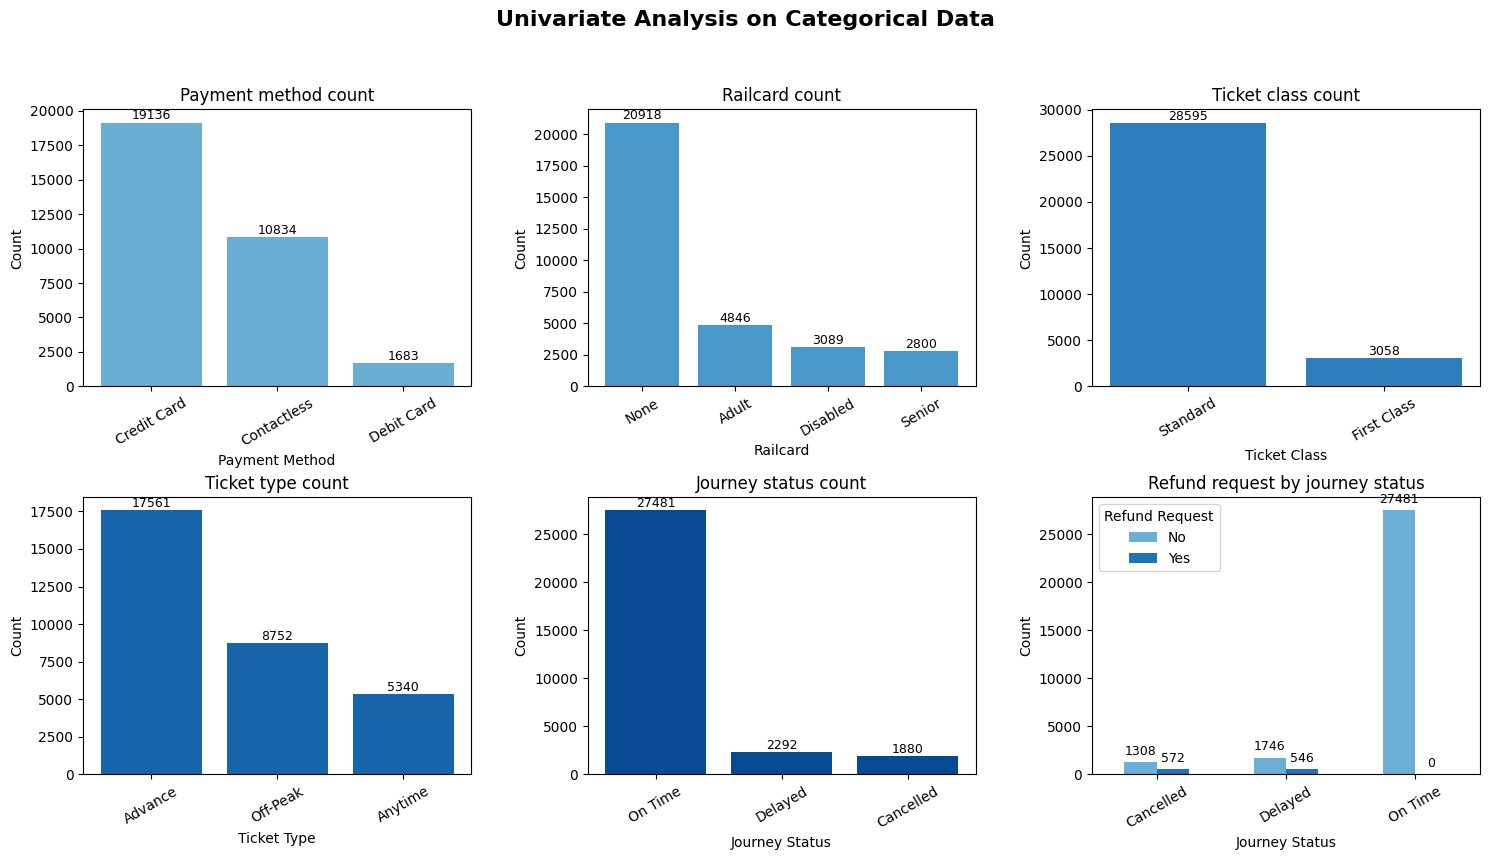

In [63]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create bar plots for categorical variables
fig, axs = plt.subplots(2, 3, figsize=(15, 9))
fig.suptitle("Univariate Analysis on Categorical Data", fontsize=16, fontweight='bold')

# Define color scheme
colormap = plt.cm.Blues
colors = colormap(np.linspace(0.5, 1, 6))  # More shades for variety

def add_value_labels(ax, spacing=3):
    """Add labels to the top of each bar in a bar chart."""
    for bar in ax.patches:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + spacing,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=9
        )

# Define plots info
plots_info = [
    ('Payment Method', 'Payment method count', axs[0, 0]),
    ('Railcard', 'Railcard count', axs[0, 1]),
    ('Ticket Class', 'Ticket class count', axs[0, 2]),
    ('Ticket Type', 'Ticket type count', axs[1, 0]),
    ('Journey Status', 'Journey status count', axs[1, 1])
]

# Plot simple bar charts
for idx, (col, title, ax) in enumerate(plots_info):
    counts = data[col].value_counts()
    bars = ax.bar(counts.index, counts.values, color=colors[idx])
    ax.set(xlabel=col, ylabel='Count', title=title)
    ax.tick_params(axis='x', rotation=30)
    add_value_labels(ax)

# Plot: Refund Request by Journey Status (Grouped Bar Chart)
refund_by_status = data.groupby(['Journey Status', 'Refund Request']).size().unstack(fill_value=0)
refund_by_status.plot(kind='bar', ax=axs[1, 2], color=['#6baed6', '#2171b5'])

axs[1, 2].set(xlabel='Journey Status', ylabel='Count', title='Refund request by journey status')
axs[1, 2].tick_params(axis='x', rotation=30)
axs[1, 2].legend(title='Refund Request')

# Add value labels for grouped bars
for container in axs[1, 2].containers:
    axs[1, 2].bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=3)

# Final layout tweaks
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

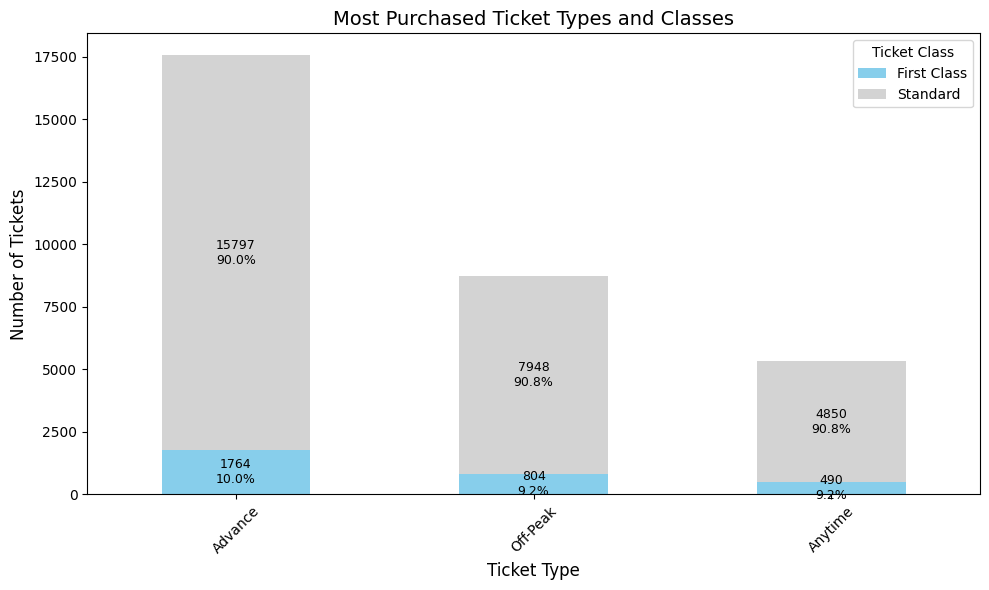

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping and preparing the data
ticket_analysis = data.groupby("Ticket Type")["Ticket Class"].value_counts().unstack().fillna(0)
ticket_analysis = ticket_analysis.loc[ticket_analysis.sum(axis=1).sort_values(ascending=False).index]

# Plotting
ax = ticket_analysis.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    color=["skyblue", "lightgray"]
)

plt.title("Most Purchased Ticket Types and Classes", fontsize=14)
plt.xlabel("Ticket Type", fontsize=12)
plt.ylabel("Number of Tickets", fontsize=12)
plt.xticks(rotation=45)

# Add count and percentage labels
totals = ticket_analysis.sum(axis=1)

for i, (idx, row) in enumerate(ticket_analysis.iterrows()):
    cum_height = 0
    for j, val in enumerate(row):
        if val > 0:
            percent = (val / totals[idx]) * 100
            label = f"{int(val)}\n{percent:.1f}%"
            ax.text(i, cum_height + val / 2 + 0.2, label, ha='center', va='center', fontsize=9)
        cum_height += val

plt.tight_layout()
plt.show()

Visualization of the most frequently occurring train stations in UK railway data, categorized by importance and frequency.

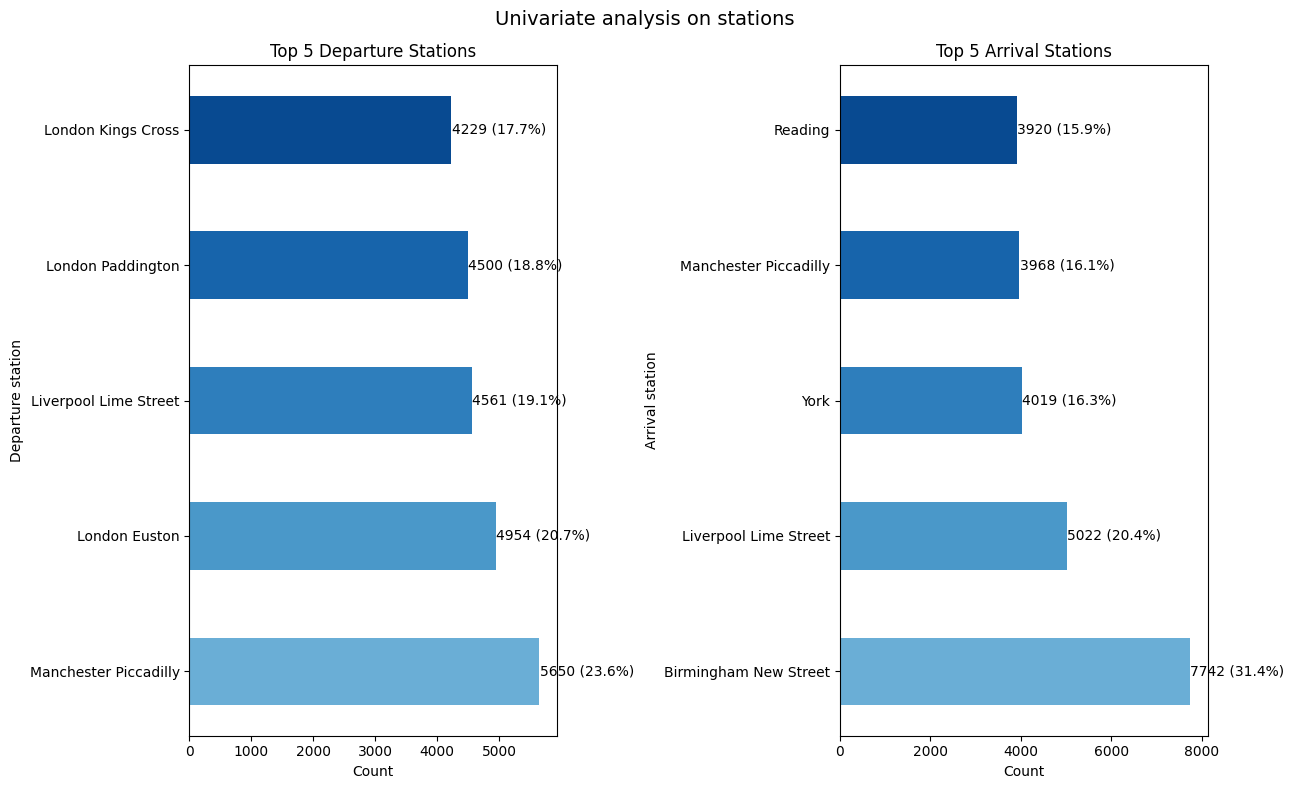

In [87]:
fig, axs = plt.subplots(1, 2, figsize=(13, 8))
fig.suptitle("Univariate analysis on stations", fontsize=14)

# Get top 5 departure stations
dept_station_counts = data['Departure Station'].value_counts().head(5)
total_departures = dept_station_counts.sum()

# Thinner bars by setting height to 0.5 (adjust this value as needed)
axs[0].barh(dept_station_counts.index, dept_station_counts.values, color=colors, height=0.5)
axs[0].set(xlabel='Count', ylabel='Departure station', title='Top 5 Departure Stations')

# Add count and percentage labels to each bar
for i, (count, station) in enumerate(zip(dept_station_counts.values, dept_station_counts.index)):
    percentage = (count / total_departures) * 100
    axs[0].text(count + 2, i, f'{count} ({percentage:.1f}%)', va='center', ha='left', fontsize=10)

# Get top 5 arrival stations
arr_station_counts = data['Arrival Destination'].value_counts().head(5)
total_arrivals = arr_station_counts.sum()

# Thinner bars by setting height to 0.5
axs[1].barh(arr_station_counts.index, arr_station_counts.values, color=colors, height=0.5)
axs[1].set(xlabel='Count', ylabel='Arrival station', title='Top 5 Arrival Stations')

# Add count and percentage labels to each bar
for i, (count, station) in enumerate(zip(arr_station_counts.values, arr_station_counts.index)):
    percentage = (count / total_arrivals) * 100
    axs[1].text(count + 2, i, f'{count} ({percentage:.1f}%)', va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()

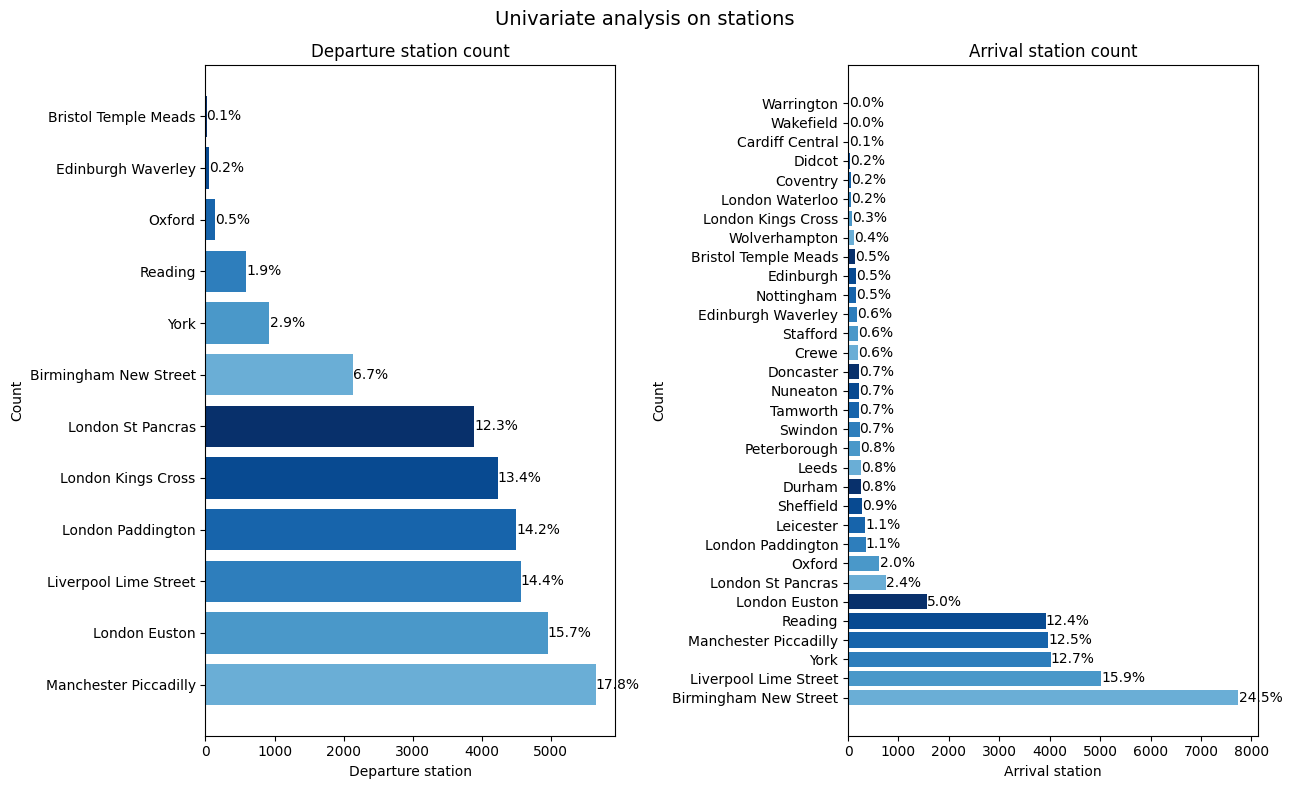

In [88]:
import matplotlib.pyplot as plt

# Count the number of occurrences for each departure and arrival station
dept_station_counts = data['Departure Station'].value_counts()
arr_station_counts = data['Arrival Destination'].value_counts()

# Calculate the total counts for percentage calculation
total_dept = dept_station_counts.sum()
total_arr = arr_station_counts.sum()

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(13, 8))
fig.suptitle("Univariate analysis on stations", fontsize=14)

# Plot the departure station counts as a horizontal bar chart
axs[0].barh(dept_station_counts.index, dept_station_counts.values, color=colors)
axs[0].set(xlabel='Departure station', ylabel='Count', title='Departure station count')

# Add percentage labels next to each bar in the departure chart
for i, (count, label) in enumerate(zip(dept_station_counts.values, dept_station_counts.index)):
    percent = (count / total_dept) * 100
    axs[0].text(count + 1, i, f"{percent:.1f}%", va='center')

# Plot the arrival station counts as a horizontal bar chart
axs[1].barh(arr_station_counts.index, arr_station_counts.values, color=colors)
axs[1].set(xlabel='Arrival station', ylabel='Count', title='Arrival station count')

# Add percentage labels next to each bar in the arrival chart
for i, (count, label) in enumerate(zip(arr_station_counts.values, arr_station_counts.index)):
    percent = (count / total_arr) * 100
    axs[1].text(count + 1, i, f"{percent:.1f}%", va='center')

# Automatically adjust subplot layout for better appearance
plt.tight_layout()
plt.show()


In [89]:
# Get top 5 departure stations
top5_departure = data['Departure Station'].value_counts().nlargest(5)
total_trips = len(data)

print("Top 5 Departure Stations:")
print("=" * 30)
for i, (station, count) in enumerate(top5_departure.items(), 1):
    percentage = (count / total_trips) * 100
    print(f"{i}. {station}: {count} trips ({percentage:.1f}%)")

# Get top 5 arrival stations
top5_arrival = data['Arrival Destination'].value_counts().nlargest(5)

print("\nTop 5 Arrival Stations:")
print("=" * 30)
for i, (station, count) in enumerate(top5_arrival.items(), 1):
    percentage = (count / total_trips) * 100
    print(f"{i}. {station}: {count} trips ({percentage:.1f}%)")

Top 5 Departure Stations:
1. Manchester Piccadilly: 5650 trips (17.8%)
2. London Euston: 4954 trips (15.7%)
3. Liverpool Lime Street: 4561 trips (14.4%)
4. London Paddington: 4500 trips (14.2%)
5. London Kings Cross: 4229 trips (13.4%)

Top 5 Arrival Stations:
1. Birmingham New Street: 7742 trips (24.5%)
2. Liverpool Lime Street: 5022 trips (15.9%)
3. York: 4019 trips (12.7%)
4. Manchester Piccadilly: 3968 trips (12.5%)
5. Reading: 3920 trips (12.4%)


Technical Insights
Data Processing: Converts string timestamps to datetime objects for accurate time calculations

Delay Calculation: Computes delay as difference between scheduled and actual arrival times

Focus: Analyzes only delayed trips (>0 mins) for meaningful insights

Aggregation: Groups by destination and calculates mean delay times

Business Implications:
 Leeds shows critical delays (2.4 hrs avg) requiring immediate investigation
 Northern routes (Leeds, Doncaster, Liverpool) show systemic delay patterns
 London stations show moderate delays (30-40 mins)
 Manchester performs best among major hubs (<25 mins delay)

In [90]:


# Convert time columns to datetime format
data["Arrival Time"] = pd.to_datetime(data["Arrival Time"])
data["Actual Arrival Time"] = pd.to_datetime(data["Actual Arrival Time"])

# Calculate delay duration in minutes
data["Delay Duration (mins)"] = (data["Actual Arrival Time"] - data["Arrival Time"]).dt.total_seconds() / 60

# Filter only delayed trips (positive delay values)
delayed_data = data[data["Delay Duration (mins)"] > 0]

# Top 10 destinations with the highest average delay
top_delays = delayed_data.groupby("Arrival Destination")["Delay Duration (mins)"].mean().nlargest(10)
print(top_delays)

Arrival Destination
Leeds                    143.734375
Doncaster                 68.925926
Liverpool Lime Street     67.777778
Birmingham New Street     54.958678
Nottingham                53.785714
London Paddington         38.384615
Reading                   35.621212
London Euston             33.894587
Durham                    30.437500
Manchester Piccadilly     23.980198
Name: Delay Duration (mins), dtype: float64


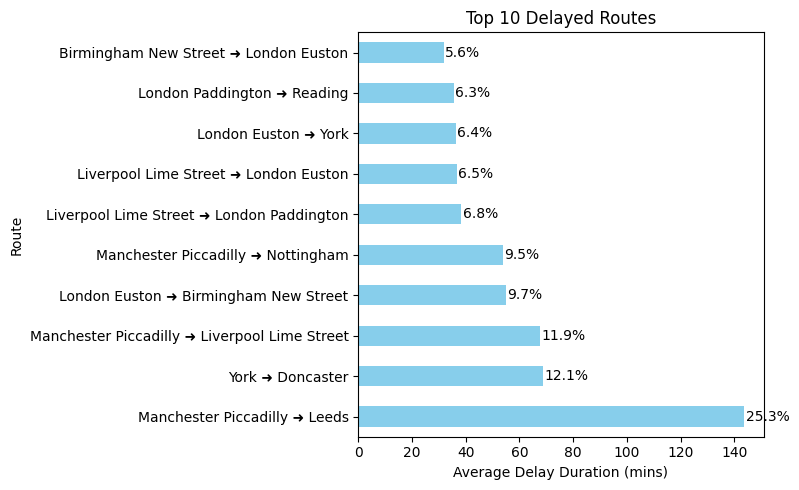

In [85]:


# Convert columns to datetime
data["Arrival Time"] = pd.to_datetime(data["Arrival Time"])
data["Actual Arrival Time"] = pd.to_datetime(data["Actual Arrival Time"])

# Calculate delay duration in minutes
data["Delay Duration (mins)"] = (data["Actual Arrival Time"] - data["Arrival Time"]).dt.total_seconds() / 60

# Filter rows with positive delay only
delayed_data = data[data["Delay Duration (mins)"] > 0].copy()

# Create 'Route' column in the filtered DataFrame
delayed_data["Route"] = delayed_data["Departure Station"] + " ➜ " + delayed_data["Arrival Destination"]

# Group by Route and get the top 10 routes with the highest average delay
top_routes = delayed_data.groupby("Route")["Delay Duration (mins)"].mean().nlargest(10)

# Calculate percentages
total_delay = top_routes.sum()
percentages = (top_routes / total_delay) * 100

# Plot the result
ax = top_routes.plot(
    kind="barh",
    title="Top 10 Delayed Routes",
    figsize=(8, 5),
    color="skyblue"
)

# Annotate the bars with percentage labels
for i, (value, percent) in enumerate(zip(top_routes, percentages)):
    ax.text(value + 0.5, i, f"{percent:.1f}%", va='center')

plt.xlabel("Average Delay Duration (mins)")
plt.tight_layout()
plt.show()


##  Summary Statistics for Price

- **Count**: 31,653 entries (number of tickets).
- **Mean**: The average price is **£23.44**.
- **Standard Deviation (std)**: Price varies by **~£30** from the average.
- **Min**: The lowest ticket price is **£1**.
- **25%**: 25% of prices are **£5 or less**.
- **50% (Median)**: Half of the prices are **£11 or less**.
- **75%**: 75% of prices are **£35 or less**.
- **Max**: The highest ticket price is **£267**.

In [69]:
# Describing the numerical variable
data["Price"].describe()

count    31653.000000
mean        23.439200
std         29.997628
min          1.000000
25%          5.000000
50%         11.000000
75%         35.000000
max        267.000000
Name: Price, dtype: float64

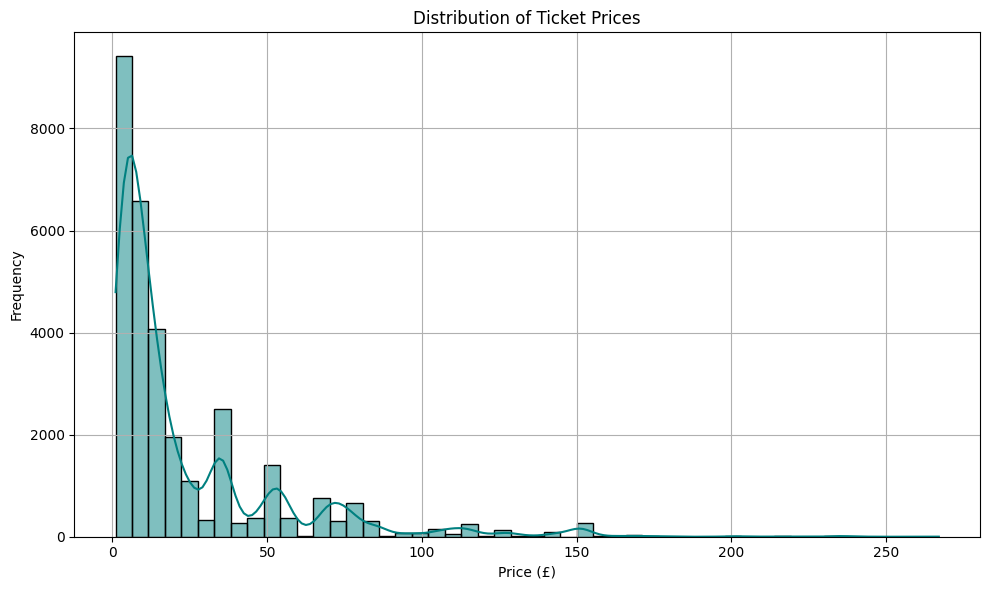

In [70]:
# Tickets Prices Distribution Chart

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=50, kde=True, color='teal')
plt.title('Distribution of Ticket Prices')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


-When journeys were on time, no customers requested a refund
  (0 refund requests out of 27,481 trips).

-When journeys were delayed, 546 customers requested refunds,
  which is a significant portion compared to 1,746 who didn’t.

-For cancelled trips, 572 customers requested refunds 
  versus 1,308 who didn’t.

Refund requests are strongly influenced by service disruption. 
Most customers accept on-time service, 
while delays and cancellations lead to a notable number of refund claims.

In [71]:
pd.crosstab(data['Journey Status'],data['Refund Request'])

Refund Request     No  Yes
Journey Status            
Cancelled        1308  572
Delayed          1746  546
On Time         27481    0

In [91]:
count_crosstab = pd.crosstab(data['Journey Status'], data['Refund Request'])
percentage_crosstab = pd.crosstab(data['Journey Status'], data['Refund Request'], normalize='index') * 100


combined_crosstab = count_crosstab.astype(str) + " (" + percentage_crosstab.round(2).astype(str) + "%)"

combined_crosstab.columns = [f"{col} Count (Percentage)" for col in combined_crosstab.columns]


print(combined_crosstab)

               No Count (Percentage) Yes Count (Percentage)
Journey Status                                             
Cancelled              1308 (69.57%)           572 (30.43%)
Delayed                1746 (76.18%)           546 (23.82%)
On Time               27481 (100.0%)               0 (0.0%)


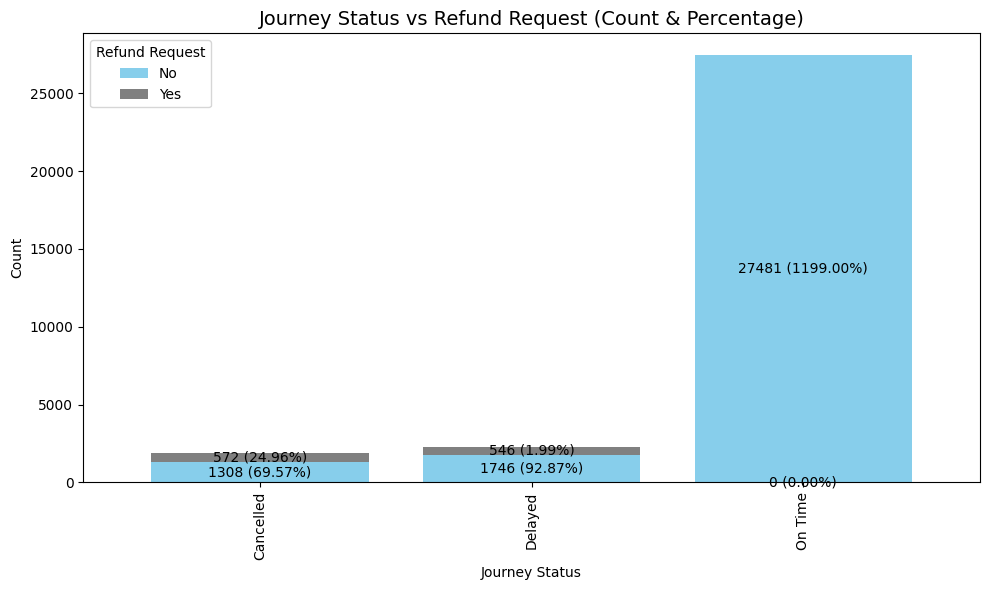

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
count_crosstab = pd.crosstab(data['Journey Status'], data['Refund Request'])
percentage_crosstab = pd.crosstab(data['Journey Status'], data['Refund Request'], normalize='index') * 100

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the count data as a stacked bar plot
count_crosstab.plot(kind='bar', stacked=True, ax=ax, color=['skyblue', 'gray'], width=0.8)

# Adding count and percentage annotations
for i, p in enumerate(ax.patches):
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = p.get_y() + height / 2
    # Find the row index for the current patch
    row_index = i // len(count_crosstab.columns)
    count_value = height
    percentage = (count_value / count_crosstab.iloc[row_index].sum()) * 100
    ax.annotate(f'{int(count_value)} ({percentage:.2f}%)', 
                (x, y), ha='center', va='center', fontsize=10, color='black')

# Setting labels and title
ax.set_title('Journey Status vs Refund Request (Count & Percentage)', fontsize=14)
ax.set_ylabel('Count')
ax.set_xlabel('Journey Status')
ax.legend(title='Refund Request', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()


This code cleans and standardizes the values in the Reason for Delay column.

Some reasons were written inconsistently ( "staffing" and "Staffing"), and we replace them with a consistent format ("Staff Shortage").

It improves data quality by reducing duplicates caused by inconsistent capitalization or naming.

This is essential before doing any analysis or visualization on delay reasons.



In [73]:
# Data Cleaning – Standardizing Delay Reasons

# Dictionary of inconsistent values and their corrected forms

corrections = {
    'Staffing': 'Staff Shortage',
    'staffing': 'Staff Shortage',
    'Signal failure': 'Signal Failure',
    'signal failure': 'Signal Failure',
    'Weather Conditions': 'Weather',
    'Technical Issue': 'Technical Issue',
    'Traffic': 'Traffic',
    
}
# Replace inconsistent values with standardized ones
data['Reason for Delay'] = data['Reason for Delay'].replace(corrections)

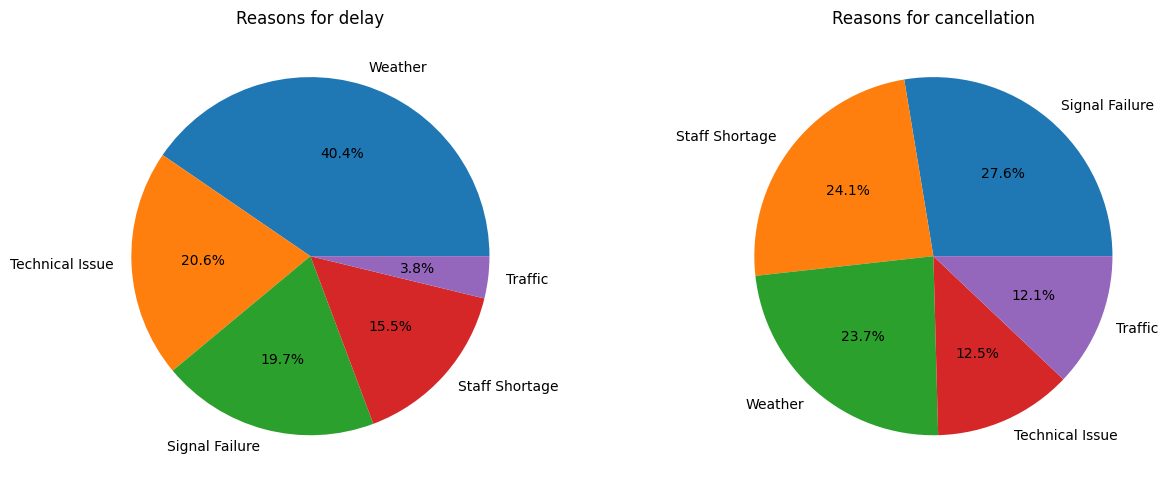

In [74]:
fig, axs = plt.subplots(1,2,figsize=(13, 5))

# Reasons for delay when journey status is delayed
reason_counts_delay = data.groupby('Journey Status')['Reason for Delay'].value_counts()
axs[0].pie(reason_counts_delay['Delayed'].values, labels=reason_counts_delay['Delayed'].index, autopct='%1.1f%%')
axs[0].set_title('Reasons for delay')

# Reasons for delay when journey status is cancelled
reason_counts_cancel = data.groupby('Journey Status')['Reason for Delay'].value_counts()
axs[1].pie(reason_counts_cancel['Cancelled'].values, labels=reason_counts_cancel['Cancelled'].index, autopct='%1.1f%%')
axs[1].set_title('Reasons for cancellation')

plt.tight_layout()
plt.show()

In [76]:
data['Date of Journey'] = pd.to_datetime(data['Date of Journey'])
data['Weekday'] = data['Date of Journey'].dt.day_name()


In [77]:
weekday_counts = data['Weekday'].value_counts().sort_index()
print(weekday_counts)


Weekday
Friday       4351
Monday       4436
Saturday     4407
Sunday       4580
Thursday     4580
Tuesday      4607
Wednesday    4692
Name: count, dtype: int64


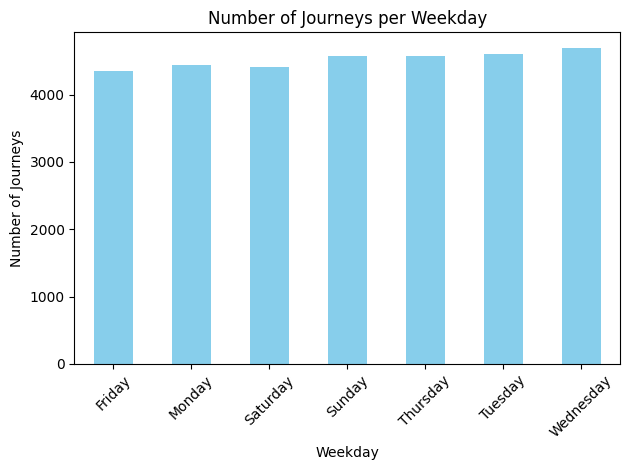

In [78]:
import matplotlib.pyplot as plt

weekday_counts.plot(kind='bar', color='skyblue', title='Number of Journeys per Weekday')
plt.xlabel("Weekday")
plt.ylabel("Number of Journeys")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
